<h1><b><center> Multiclass Classification</center></b></h1>

**We will be using the iris dataset consisting of:**
- 3 different types of irises’ (Setosa y=0, Versicolour y=1, and Virginica y=2)
- petal and sepal length and width
- a 150x4 numpy.ndarray

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
plot_colors = "ryb"
plot_step = 0.02

#Create a function that will plot different decision boundaries
def decision_boundary (X,y,model,iris, two=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z,cmap=plt.cm.RdYlBu)
    
    if two:
        cs = plt.contourf(xx, yy, Z,cmap=plt.cm.RdYlBu)
        for i, color in zip(np.unique(y), plot_colors):
            
            idx = np.where( y== i)
            plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)
        plt.show()
  
    else:
        set_={0,1,2}
        print(set_)
        for i, color in zip(range(3), plot_colors):
            idx = np.where( y== i)
            if np.any(idx):

                set_.remove(i)

                plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


        for  i in set_:
            idx = np.where( iris.target== i)
            plt.scatter(X[idx, 0], X[idx, 1], marker='x',color='black')

        plt.show()


In [3]:
#Create a function that will plot the probability of belonging to each class
def plot_probability_array(X,probability_array):

    plot_array=np.zeros((X.shape[0],30))
    col_start=0
    ones=np.ones((X.shape[0],30))
    for class_,col_end in enumerate([10,20,30]):
        plot_array[:,col_start:col_end]= np.repeat(probability_array[:,class_].reshape(-1,1), 10,axis=1)
        col_start=col_end
    plt.imshow(plot_array)
    plt.xticks([])
    plt.ylabel("samples")
    plt.xlabel("probability of 3 classes")
    plt.colorbar()
    plt.show()

In [4]:
#Load iris dataset
#columns are: Sepal Length, Sepal Width, Petal Length and Petal Width; we want only the width columns
pair=[1, 3]
iris = datasets.load_iris()

#.data is the data matrix
X = iris.data[:, pair]

#.target is the classification target
y = iris.target 

#Find the unique values of y
np.unique(y)

array([0, 1, 2])

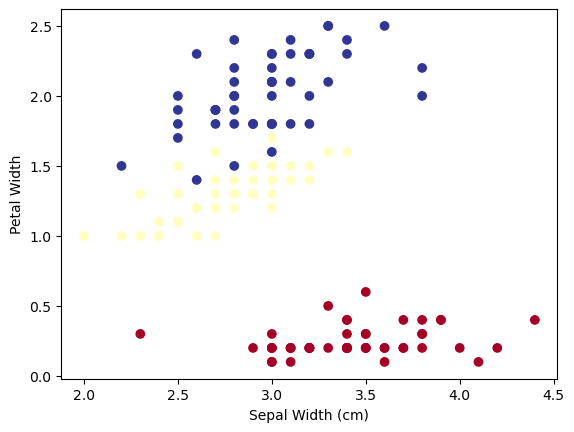

In [14]:
#Create a scatterplot with petal and sepal width
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Petal Width")
plt.show()

## **SoftMax Regression**
- Similar to Logistic Regression
- Can't use Softmax regression for SVMs!
- https://towardsdatascience.com/deep-dive-into-softmax-regression-62deea103cb8
- https://www.mygreatlearning.com/blog/introduction-to-softmax-regression/

In [15]:
#Fit the model
lr = LogisticRegression(random_state=0).fit(X, y)

In [16]:
#Generate the probability
probability=lr.predict_proba(X)

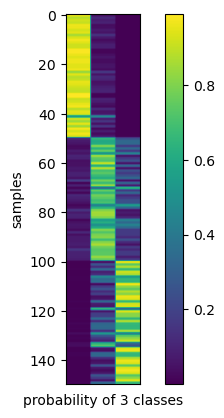

In [17]:
#Plot the probability of belonging to each class
#each column is the probability of belonging to a class; the row number is the sample number
plot_probability_array(X,probability)

In [18]:
#What is the output of the first sample?
probability[0,:]

array([9.57671606e-01, 4.22321095e-02, 9.62845517e-05])

In [19]:
#The first sample should sum to one
probability[0,:].sum()

1.0

In [20]:
#Apply the argmax function
#Argmax:finds the argument that gives the maximum value from a target function
np.argmax(probability[0,:])

0

In [21]:
#Apply argmax function to each sample
softmax_prediction=np.argmax(probability,axis=1)
softmax_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [22]:
#Compare to output of predict method
yhat =lr.predict(X)
accuracy_score(yhat,softmax_prediction)

1.0

## **Support Vector Machines (SVMs)**
- Machine learning method for classification
- Supervised algorithm 
- Automatically performs multi-class classification

In [23]:
#Train a SVM classifier
model = SVC(kernel='linear', gamma=.5, probability=True)

model.fit(X,y)

SVC(gamma=0.5, kernel='linear', probability=True)

In [24]:
#Find the accuracy_score on the training data
yhat = model.predict(X)

accuracy_score(y,yhat)

0.96

{0, 1, 2}


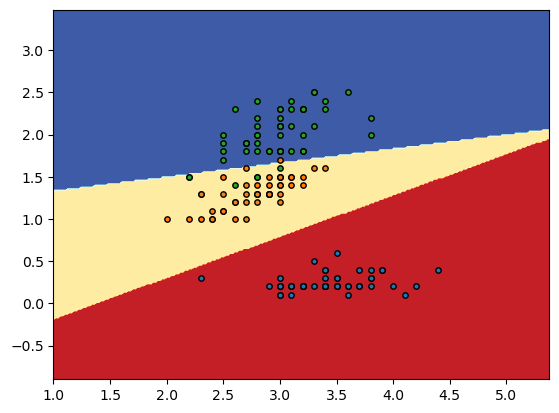

In [25]:
#Plot the decision_boundary
decision_boundary (X,y,model,iris)

**Heuristic Methods** can be used to split a multi-class classification problem into multiple binary classification datasets and then train a binary classification model for each set.

## **One vs. All (One-vs-Rest) Classification**
- A heuristic method for using binary classification algorithms for multi-class classification.
- Requires one model to be created for each class.

{0, 1, 2}


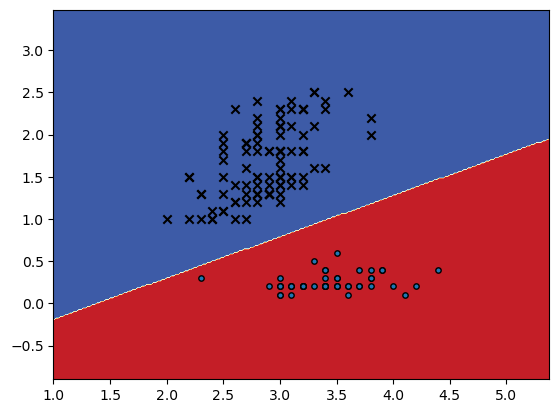

{0, 1, 2}


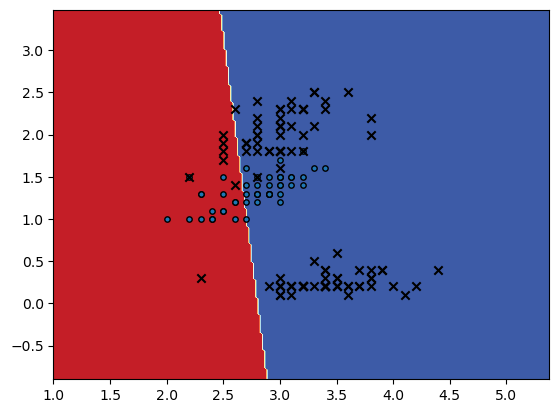

{0, 1, 2}


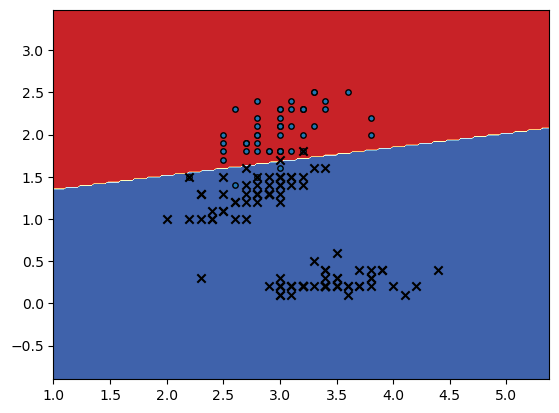

In [26]:
#Dummy class
dummy_class=y.max()+1

#List used for classifiers 
my_models=[]

#Iterate through each class
for class_ in np.unique(y):
    #select the index of our  class
    select=(y==class_)
    temp_y=np.zeros(y.shape)
    #class, we are trying to classify 
    temp_y[y==class_]=class_
    #set other samples  to a dummy class 
    temp_y[y!=class_]=dummy_class
    #Train model and add to list 
    model=SVC(kernel='linear', gamma=.5, probability=True)    
    my_models.append(model.fit(X,temp_y))
    #plot decision boundary 
    decision_boundary (X,temp_y,model,iris)

The class we are interested in is in red, and the dummy class is in blue. Similarly, the class samples are marked in blue, and the dummy samples are marked with a black x.

In [27]:
#For each sample we calculate the probability of belonging to each class (not including the dummy class)
probability_array=np.zeros((X.shape[0],3))
for j,model in enumerate(my_models):

    real_class=np.where(np.array(model.classes_)!=3)[0]

    probability_array[:,j]=model.predict_proba(X)[:,real_class][:,0]

In [28]:
#What is the probability of belonging to each class for the first sample?
probability_array[0,:]

array([9.92230620e-01, 1.13952006e-01, 8.12417973e-12])

In [29]:
#It should NOT sum to 1
probability_array[0,:].sum()

1.1061826258008587

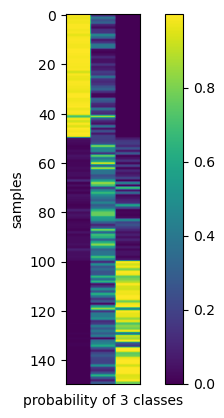

In [30]:
#Plot the probability of belonging to the class
plot_probability_array(X,probability_array)

In [31]:
#Apply the argmax function to each sample to find the class
one_vs_all=np.argmax(probability_array,axis=1)
one_vs_all

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [32]:
#Calculate the accuracy
accuracy_score(y,one_vs_all)

0.9466666666666667

In [33]:
#Compare to accuracy of SVM sklearn (One vs. One)
accuracy_score(one_vs_all,yhat)

0.9733333333333334

## One vs. One Classification
- A heuristic method for using binary classification algorithms for multi-class classification.
- Unlike one-vs-rest that splits it into one binary dataset for each class, the one-vs-one approach splits the dataset into *one dataset for each class* versus every other class.

In [35]:
#List each class
classes_=set(np.unique(y))
classes_

{0, 1, 2}

In [36]:
#Determine the number of classifiers
K=len(classes_)
K*(K-1)/2

3.0

class 0 vs class 1 


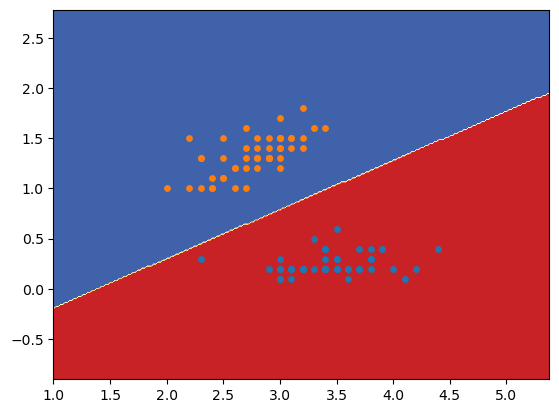

class 0 vs class 2 


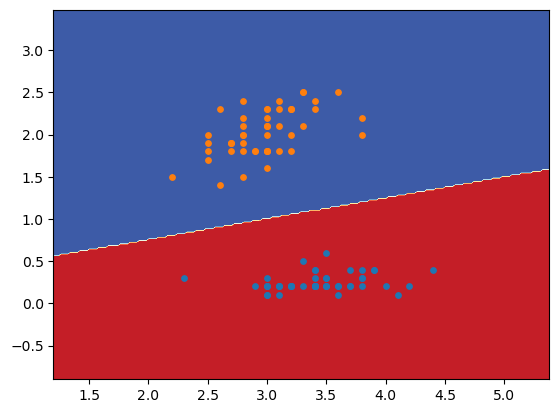

class 1 vs class 2 


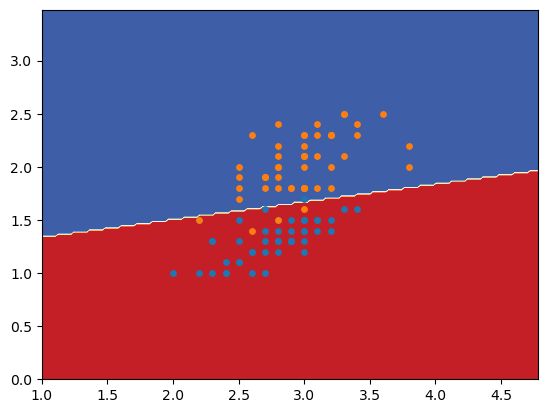

In [37]:
#Train a two-class classifier on each pair of classes
#Plot the different training points for each of the two classes
pairs=[]
left_overs=classes_.copy()
#list used for classifiers 
my_models=[]
#iterate through each class
for class_ in classes_:
    #remove class we have seen before 
    left_overs.remove(class_)
    #the second class in the pair
    for second_class in left_overs:
        pairs.append(str(class_)+' and '+str(second_class))
        print("class {} vs class {} ".format(class_,second_class) )
        temp_y=np.zeros(y.shape)
        #find classes in pair 
        select=np.logical_or(y==class_ , y==second_class)
        #train model 
        model=SVC(kernel='linear', gamma=.5, probability=True)  
        model.fit(X[select,:],y[select])
        my_models.append(model)
        #Plot decision boundary for each pair and corresponding Training samples. 
        decision_boundary (X[select,:],y[select],model,iris,two=True)

In [38]:
#Plot the distribution of text length
pairs
majority_vote_array=np.zeros((X.shape[0],3))
majority_vote_dict={}
for j,(model,pair) in enumerate(zip(my_models,pairs)):

    majority_vote_dict[pair]=model.predict(X)
    majority_vote_array[:,j]=model.predict(X)

In [39]:
pd.DataFrame(majority_vote_dict).head(10)

,0 and 1,0 and 2,1 and 2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In this table, each column is the output of a classifier for each pair of classes and the output is the prediction.

In [40]:
#Perform classification on a sample by using a majority vote (select the class with the most predictions)
#Repeat the process for each sample
one_vs_one=np.array([np.bincount(sample.astype(int)).argmax() for sample  in majority_vote_array]) 
one_vs_one

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [41]:
#Calculate the accuracy
accuracy_score(y,one_vs_one)

0.96

# Resources

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

https://machinelearningmastery.com/argmax-in-machine-learning/

https://towardsdatascience.com/multi-class-classification-one-vs-all-one-vs-one-94daed32a87b

https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/

*This notebook was created for practice/notetaking for the IBM Data Science Certificate through Coursera and the lab assignment was created/edited by Joseph Santarcangelo and Azim Hirjani.*